# **Customer Churn Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import joblib

In [2]:
file_path = "/content/Customer_churn_data.xlsx"

In [3]:
sheet_name = 'vw_ChurnData'

In [4]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [5]:
df.head()


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12728-AND,Female,28,Yes,Andhra Pradesh,2,13,NaN,Yes,Yes,...,Credit Card,80.300003,324.200012,0.0,0,154.960007,479.160004,Stayed,Others,Others
1,12736-ASS,Female,62,No,Assam,10,3,NaN,Yes,No,...,Bank Withdrawal,69.349998,69.349998,0.0,0,22.030001,91.379997,Churned,Attitude,Attitude of service provider
2,12739-HAR,Male,57,Yes,Haryana,1,31,NaN,Yes,Yes,...,Credit Card,88.650002,5321.250000,0.0,0,1194.380005,6515.629883,Stayed,Others,Others
3,12746-WES,Male,53,No,West Bengal,7,17,NaN,Yes,No,...,Credit Card,19.950001,59.250000,0.0,0,139.440002,198.690002,Stayed,Others,Others
4,12752-RAJ,Female,30,No,Rajasthan,4,17,NaN,Yes,No,...,Credit Card,20.500000,1424.900024,0.0,0,3291.879883,4716.779785,Stayed,Others,Others


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [7]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


In [8]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

# **Data Processing**

In [9]:
# dropping unwanted columns

df1 = df.drop(['Customer_ID','Churn_Category', 'Churn_Reason'] , axis = 1)

In [10]:
# encode categorical columns

columns_to_encode = ['Gender',  'Married', 'State','Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies','Contract',
       'Streaming_Music', 'Unlimited_Data', 'Paperless_Billing',
       'Payment_Method']

In [11]:
# encoding the categorical variables

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()
    df1[column] = label_encoders[column].fit_transform(df1[column])

In [12]:
# manually encode the targeted variables

df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [13]:

# manually encode the targeted variables
df1['Customer_Status'] = df1['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [14]:
df1['Customer_Status'].unique()


array([0, 1])

In [15]:
# splitting the data into the features and target

X = df1.drop('Customer_Status' , axis = 1)
y = df1['Customer_Status']


In [16]:
X.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,28,1,0,2,13,5,1,1,1,...,1,0,1,1,80.300003,324.200012,0.0,0,154.960007,479.160004
1,0,62,0,1,10,3,5,1,0,1,...,1,0,1,0,69.349998,69.349998,0.0,0,22.030001,91.379997
2,1,57,1,6,1,31,5,1,1,1,...,1,2,0,1,88.650002,5321.250000,0.0,0,1194.380005,6515.629883
3,1,53,0,21,7,17,5,1,0,0,...,0,0,1,1,19.950001,59.250000,0.0,0,139.440002,198.690002
4,0,30,0,16,4,17,5,1,0,0,...,0,2,0,1,20.500000,1424.900024,0.0,0,3291.879883,4716.779785


In [20]:
X.describe()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,...,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,0.370901,47.289163,0.498585,11.235725,7.439820,17.39454,3.646579,0.901781,0.444814,0.796404,...,0.688197,0.796904,0.601631,0.482770,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,0.483086,16.805110,0.500040,6.351773,4.622369,10.59292,1.772655,0.297635,0.496987,0.402705,...,0.463268,0.853020,0.489603,0.593556,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,0.000000,18.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,0.000000,33.000000,0.000000,6.000000,3.000000,8.00000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,0.000000,47.000000,0.000000,12.000000,7.000000,17.00000,5.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,1.000000,60.000000,1.000000,17.000000,11.000000,27.00000,5.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,1.000000,84.000000,1.000000,21.000000,15.000000,36.00000,5.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


In [17]:
y.head()

,Customer_Status
0,0
1,1
2,0
3,0
4,0


In [21]:
y.describe()

,Customer_Status
count,6007.000000
mean,0.288330
std,0.453023
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [54]:

y.groupby(y).count()

,Customer_Status
Customer_Status,
0,4275
1,1732


In [206]:
# we can see that we have a imbalanced data set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Training Random Forest Model ( with 100 D trees )

rf_model = RandomForestClassifier(n_estimators = 100 , random_state=42)

# train

rf_model.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [58]:
rf_model.score(X_test , y_test)

0.8444259567387687

In [59]:
rf_model.score(X_train , y_train)

0.9997918834547347

In [60]:
# make predictions of  the model

y_pred = rf_model.predict(X_test)


In [61]:
# evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[795  54]
 [133 220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       849
           1       0.80      0.62      0.70       353

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



### **Our Model is Working with Low Recall and Accuracy**

### **Accuracy : 84 %**
### **Recall : 62 %**
### **Precision : 80 %**
### **f1-score : 70 %**

# **lets retrain model with resampling techniques**

In [73]:
# we can see that recall for churned data is low compared to others because of the imbalance data set

y.groupby(y).count()

,Customer_Status
Customer_Status,
0,4275
1,4275


In [64]:
# feature selection process

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]



<ipython-input-65-642e71f46aa3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = importances[indices] , y = X.columns[indices] , palette="viridis")


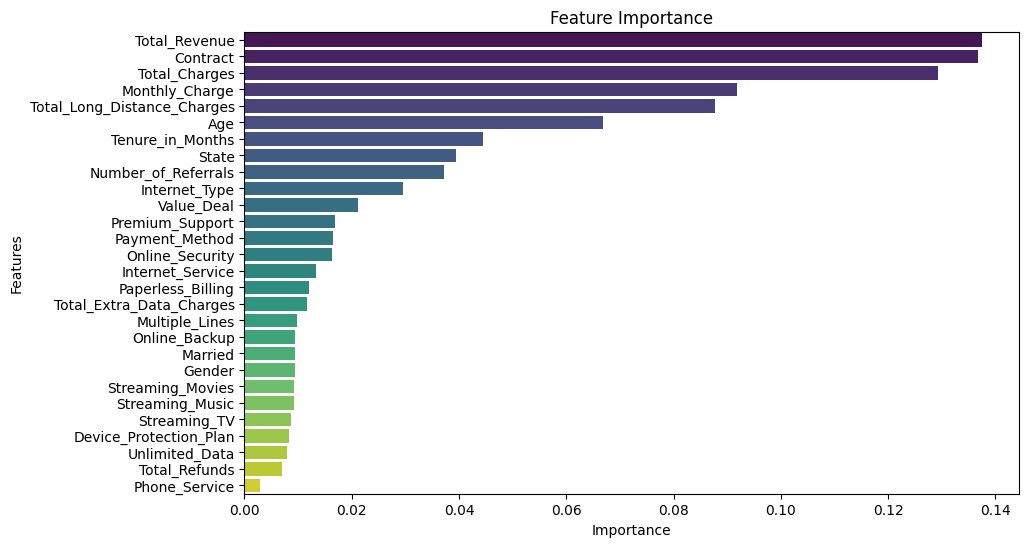

In [65]:
# Plot the features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot( x = importances[indices] , y = X.columns[indices] , palette="viridis")

plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

plt.show()


In [72]:
y.groupby(y).count()

,Customer_Status
Customer_Status,
0,4275
1,4275


## **Lets Populate the Churned Data using resampling Technique**

In [169]:
# Lets Upsample the data of churned data using the resample model

import pandas as pd
import numpy as np
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df1[df1.Customer_Status==0]
df_minority = df1[df1.Customer_Status==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
# df_upsampled.Customer_Status.value_counts()



In [170]:
df_upsampled.Customer_Status.value_counts()

,count
Customer_Status,
0,4275
1,4275


In [171]:
df_majority.shape  # non churned data


(4275, 29)

In [172]:
df_minority.shape  # churned data

(1732, 29)

In [173]:
y.groupby(y).count()

,Customer_Status
Customer_Status,
0,4275
1,2543


In [174]:

# Split the data into features and target
X = df_upsampled.drop('Customer_Status', axis=1)
y = df_upsampled['Customer_Status']


In [175]:
X.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,28,1,0,2,13,5,1,1,1,...,1,0,1,1,80.300003,324.200012,0.0,0,154.960007,479.160004
2,1,57,1,6,1,31,5,1,1,1,...,1,2,0,1,88.650002,5321.250000,0.0,0,1194.380005,6515.629883
3,1,53,0,21,7,17,5,1,0,0,...,0,0,1,1,19.950001,59.250000,0.0,0,139.440002,198.690002
4,0,30,0,16,4,17,5,1,0,0,...,0,2,0,1,20.500000,1424.900024,0.0,0,3291.879883,4716.779785
5,0,39,0,17,11,18,5,1,0,0,...,0,2,1,1,19.700001,494.049988,0.0,0,1111.199951,1605.250000


In [176]:
y.head()

,Customer_Status
0,0
2,0
3,0
4,0
5,0


In [185]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:

# Training Random Forest Model (with 100 decision trees)

rf_model_upsampled = RandomForestClassifier(n_estimators=100, random_state=42 )

# Train the model on the upsampled data
rf_model_upsampled.fit(X_train, y_train)

# Make predictions
y_pred_upsampled = rf_model_upsampled.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Upsampled Data):")
print(confusion_matrix(y_test, y_pred_upsampled))
print("\nClassification Report (Upsampled Data):")
print(classification_report(y_test, y_pred_upsampled))


Confusion Matrix (Upsampled Data):
[[776  76]
 [ 30 828]]

Classification Report (Upsampled Data):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       852
           1       0.92      0.97      0.94       858

    accuracy                           0.94      1710
   macro avg       0.94      0.94      0.94      1710
weighted avg       0.94      0.94      0.94      1710



In [187]:
rf_model_upsampled.score(X_test , y_test)

0.9380116959064327

In [188]:
rf_model_upsampled.score(X_train , y_train)

1.0

### **Our Model is Working Fine with Both training and Testing Data**

### **Accuracy : 94 %**
### **Recall : 97 %**
### **Precision : 92 %**
### **f1-score : 94 %**




# **Lets predict the New joined Data**

In [189]:
sheet_name = 'vw_JoinData'

new_df = pd.read_excel(file_path, sheet_name=sheet_name)

new_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,15803-UTT,Female,34,No,Uttar Pradesh,6,31,NaN,Yes,No,...,Credit Card,19.150000,19.150000,0.0,0,22.370001,41.520000,Joined,Others,Others
1,17154-HAR,Male,32,No,Haryana,13,4,NaN,Yes,No,...,Mailed Check,18.799999,18.799999,0.0,0,43.570000,62.369999,Joined,Others,Others
2,17250-HAR,Female,23,Yes,Haryana,12,2,NaN,Yes,No,...,Credit Card,49.250000,97.000000,0.0,0,81.500000,178.500000,Joined,Others,Others
3,19539-PUN,Female,37,Yes,Punjab,14,8,Deal 5,Yes,No,...,Credit Card,45.400002,45.400002,0.0,0,49.330002,94.730003,Joined,Others,Others
4,19541-ODI,Female,37,Yes,Odisha,15,14,Deal 5,Yes,No,...,Credit Card,45.250000,74.199997,0.0,0,79.000000,153.199997,Joined,Others,Others


In [193]:
# retaining the original df tp preserve unencoded columns
original_df = new_df.copy()

customer_ids = new_df['Customer_ID']

In [194]:
new_df = new_df.drop(['Customer_ID','Churn_Category', 'Churn_Reason','Customer_Status'] , axis = 1)

In [195]:
object_columns = new_df.select_dtypes(include=['object']).columns

object_columns

Index(['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method'],
      dtype='object')

In [196]:
# encode the categorical variables

for column in object_columns:
    new_df[column] = label_encoders[column].transform(new_df[column])



In [197]:
new_df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,34,0,19,6,31,5,1,0,0,...,0,0,0,1,19.150000,19.150000,0.0,0,22.370001,41.520000
1,1,32,0,6,13,4,5,1,0,0,...,0,1,0,2,18.799999,18.799999,0.0,0,43.570000,62.369999
2,0,23,1,6,12,2,5,1,0,1,...,1,0,0,1,49.250000,97.000000,0.0,0,81.500000,178.500000
3,0,37,1,15,14,8,4,1,0,1,...,1,0,1,1,45.400002,45.400002,0.0,0,49.330002,94.730003
4,0,37,1,13,15,14,4,1,0,1,...,1,0,1,1,45.250000,74.199997,0.0,0,79.000000,153.199997


In [202]:
# model predictions

new_predictions = rf_model_upsampled.predict(new_df)

new_predictions.shape

(411,)

In [203]:
rf_model_upsampled.score(new_df, new_predictions)

1.0

In [204]:
original_df['Predicted_Churn'] = new_predictions

In [205]:
# filter the data frame to include only records predicted as "Churned"

original_df = original_df[original_df['Predicted_Churn'] == 1]


# save the results

original_df.to_csv("Predicted_Churned_data_Power_BI.csv", index=False)